In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store firs n eigenvectors
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [3]:
#data = datasets.load_digits()
data = datasets.load_iris()
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X = data.data
y = data.target

In [5]:
#no. of classes
classes=list(np.unique(y))
print(classes)

[0, 1, 2]


In [6]:
# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)


In [7]:
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


In [8]:
#two selected features with high variance
print(X_projected)

[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.63953472 -0.31203998]
 [-2.63198939  0.19696122]
 [-2.58739848  0.20431849]
 [-2.4099325  -0.41092426]
 [-2.64886233 -0.81336382]
 [-2.59873675 -1.09314576]
 [-2.63692688  0.12132235]
 [-2.86624165 -0.06936447]
 [-2.62523805 -0.59937002]
 

In [9]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

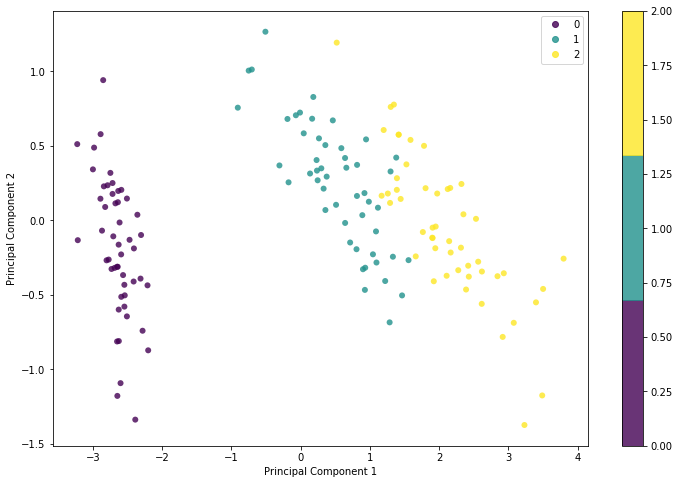

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize']=12,8

scatter=plt.scatter(x1, x2,
        c=y, edgecolor='none', alpha=0.8,
        cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0],labels=classes)
plt.colorbar()
plt.show()